# Geometric Series

Formulas:
$$1 + c + c^2 + \cdots = \frac{1}{1-c}$$
$$1 + c + c^2 + \cdots + c^T = \frac{1-c^{T+1}}{1-c}$$

Economic models:
$$L_i = (1-r)D_i$$
where $L$ is loan, $r$ is the reserve rate, and $D$ is the deposit. We assume
$$D_{i+1} = L_i \tag{1}$$
Then, we could have
$$D_{i+1} = (1-r) D_i = (1-r)^i D_0$$
Therefore, the sum of all deposits in our banking system is:
$$\sum_{i=0}^\infty (1-r)^i D_0 = \frac{D_0}{1-(1-r)} = \frac{D_0}{r}$$
We call $1/r$ the __money multiplier__. 

To gain the intuition of equation (1), think about the _Ant Finance_. In the economic and financial world, we don't care _how much the economy has in total_, we care _how fast or how efficient you could make the money flow_.  

__Keynesian Multiplier__: 
$$y = \frac{1}{1-b} i$$
where $b$ is the marginal propensity to consume, and $1-b$ is called the marginal propensity to save. The quantity $1/(1-b)$ is called the investment multiplier and it has the following properties:

* the larger $b$ is, the larger of the investment multiplier will be
* vice verse

We make it as a dynamic version:
$$\frac{1}{1-b} = \sum_{t=0}^\infty b^t$$
If we modify our consumption function to assume the form:
$$c_t = b y_{t-1}$$
Then we could have
$$y_t = \frac{1-b^{t+1}}{1-b} i \to \frac{1}{1-b} i$$

The above formula is often applied to assert that an exogenous increase in investment of $\Delta i$ at time 0 ignites a dynamic process of increases in national income by successive amounts.

If we generalize the model so that the national income identity becomes
$$c_t + i_t + g_t = y_t$$

then a version of the preceding argument shows that the government expenditures multiplier is also $1/(1−b)$, so that a permanent increase in government expenditures ultimately leads to an increase in national income equal to the multiplier times the increase in government expenditures.


__Application to Asset Pricing__

A lease requires a payments stream of $x_t$ dollars at times $t = 0, 1, 2, \cdots$ where

* $G = (1+g)$, the lease payments increase at $g$ percent per period,
* nomial interest is $R = 1+r$

The __present value__ of the lease is
$$p_0 = \frac{x_0}{1-GR^{-1}} = \frac{x_0}{1-(1+g)(1+r)}$$

We can extend the asset pricing formula so that it applies to __finite leases__:
$$p_0 = \frac{x_0 (1- G^{T+1} R^{-(T+1)})}{1- GR^{-1}}$$
Applying the Taylor sereis to $G^{T+1}$ about $g=0$, we can have:
$$p_0 \approx x_0 (T+1) + \frac{x_0 rg(T+1)}{r-g}$$

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
from sympy import init_printing
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# True present value of a finite lease
def finite_lease_pv_true(T, g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return (x_0 * (1 - G**(T + 1) * R**(-T - 1))) / (1 - G * R**(-1))
# First approximation for our finite lease

def finite_lease_pv_approx_1(T, g, r, x_0):
    p = x_0 * (T + 1) + x_0 * r * g * (T + 1) / (r - g)
    return p

# Second approximation for our finite lease
def finite_lease_pv_approx_2(T, g, r, x_0):
    return (x_0 * (T + 1))

# Infinite lease
def infinite_lease(g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return x_0 / (1 - G * R**(-1))

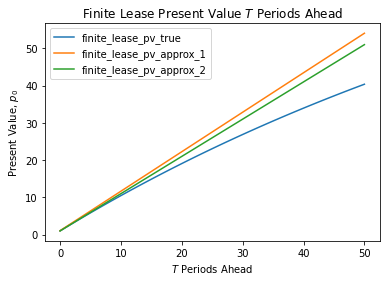

In [5]:
def plot_function(axes, x_vals, func, args):
    axes.plot(x_vals, func(*args), label=func.__name__)

T_max = 50

T = np.arange(0, T_max+1)
g = 0.02
r = 0.03
x_0 = 1

our_args = (T, g, r, x_0)
funcs = [finite_lease_pv_true,
        finite_lease_pv_approx_1,
        finite_lease_pv_approx_2]
        ## the three functions we want to compare

fig, ax = plt.subplots()
ax.set_title('Finite Lease Present Value $T$ Periods Ahead')
for f in funcs:
    plot_function(ax, T, f, our_args)
ax.legend()
ax.set_xlabel('$T$ Periods Ahead')
ax.set_ylabel('Present Value, $p_0$')
plt.show()

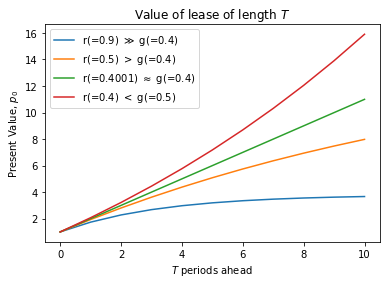

In [6]:
# Changing r and g
fig, ax = plt.subplots()
ax.set_title('Value of lease of length $T$')
ax.set_ylabel('Present Value, $p_0$')
ax.set_xlabel('$T$ periods ahead')
T_max = 10
T=np.arange(0, T_max+1)

rs, gs = (0.9, 0.5, 0.4001, 0.4), (0.4, 0.4, 0.4, 0.5),
comparisons = ('$\gg$', '$>$', r'$\approx$', '$<$')
for r, g, comp in zip(rs, gs, comparisons):
    ax.plot(finite_lease_pv_true(T, g, r, x_0), label=f'r(={r}) {comp} g(={g})')

ax.legend()
plt.show()

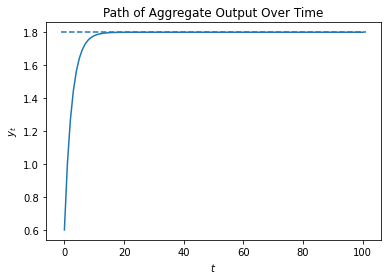

In [7]:
# Keynesian Multiplier
def calculate_y(i, b, g, T, y_init):
    y = np.zeros(T+1)
    y[0] = i + b * y_init + g
    for t in range(1, T+1):
        y[t] = b * y[t-1] + i + g
    return y

i_0 = 0.3
g_0 = 0.3
b = 2/3
y_init = 0
T = 100

fig, ax = plt.subplots()
ax.set_title('Path of Aggregate Output Over Time')
ax.set_xlabel('$t$')
ax.set_ylabel('$y_t$')
ax.plot(np.arange(0, T+1), calculate_y(i_0, b, g_0, T, y_init))
# Output predicted by geometric series
ax.hlines(i_0 / (1 - b) + g_0 / (1 - b), xmin=-1, xmax=101, linestyles='--')
plt.show()

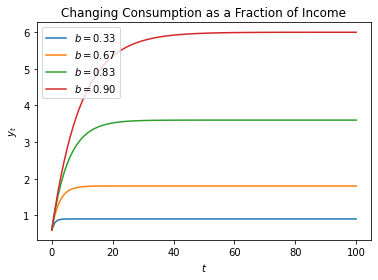

In [8]:
bs = (1/3, 2/3, 5/6, 0.9)

fig,ax = plt.subplots()
ax.set_title('Changing Consumption as a Fraction of Income')
ax.set_ylabel('$y_t$')
ax.set_xlabel('$t$')
x = np.arange(0, T+1)
for b in bs:
    y = calculate_y(i_0, b, g_0, T, y_init)
    ax.plot(x, y, label=r'$b=$'+f"{b:.2f}")
ax.legend()
plt.show()

Increasing the marginal propensity to consume b increases the path of output over time. But, why ? Here are possible explanations:

* we have to understand what is consumption? 
    - consuming food is one kind of consumption
    - consuming services is one kind of consumption too
    - consumption in modern economic world means the transaction or the instance of exchange
* the above graph assumes that the economic flow in terms of goods and money is not interrupted
* the above graph also assumes that the economic society as a whole could continue to consume, which relies on:
    - constant production
    - producing varieties
    - providing different services
    - create the new variety of production and consumption
* or you could ask: why the US could consume so much but not China or India even though the population in China and India is larger than the State. 

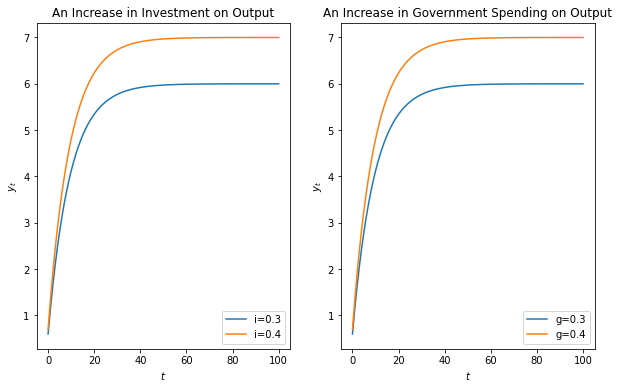

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.3)

x = np.arange(0, T+1)
values = [0.3, 0.4]

for i in values:
    y = calculate_y(i, b, g_0, T, y_init)
    ax1.plot(x, y, label=f"i={i}")
for g in values:
    y = calculate_y(i_0, b, g, T, y_init)
    ax2.plot(x, y, label=f"g={g}")

axes = ax1, ax2
param_labels = "Investment", "Government Spending"
for ax, param in zip(axes, param_labels):
    ax.set_title(f'An Increase in {param} on Output')
    ax.legend(loc ="lower right")
    ax.set_ylabel('$y_t$')
    ax.set_xlabel('$t$')
plt.show()